In [ ]:
import pandas as pd

print("⚡ 重いデータから日本車を救出中...")
df_raw = pd.read_csv('vehicles.csv',
                     usecols=['price', 'year', 'manufacturer', 'model', 'odometer', 'type'],
                     quoting=3,
                     on_bad_lines='skip',
                     engine='python')

jdm_brands = ['toyota', 'honda', 'nissan', 'subaru', 'mazda', 'mitsubishi', 'suzuki', 'lexus']
df_raw['manufacturer'] = df_raw['manufacturer'].str.lower().str.strip('"')
jdm_df = df_raw[df_raw['manufacturer'].isin(jdm_brands)].copy()

jdm_df.to_csv('jdm_clean_data.csv', index=False)
print("✅ 保存完了！これで次からは一瞬で開けます。")

⚡ 重いデータから日本車を救出中...


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc2 in position 0: invalid continuation byte

In [ ]:
import pandas as pd

df = pd.read_csv('jdm_clean_data.csv')

print(f"再開準備完了！ 日本車データ {len(df)} 件を読み込みました。")

FileNotFoundError: [Errno 2] No such file or directory: 'jdm_clean_data.csv'

In [ ]:
import pandas as pd

cols = ['price', 'year', 'manufacturer', 'model', 'odometer', 'type', 'state']
df = pd.read_csv('vehicles.csv', usecols=cols)

df_clean = df[
    (df['price'] > 500) &
    (df['price'] < 100000) &
    (df['year'] >= 1980) &
    (df['manufacturer'].notna())
].copy()

jdm_brands = ['toyota', 'honda', 'nissan', 'subaru', 'mazda', 'mitsubishi', 'suzuki', 'lexus']
df_clean['is_japanese'] = df_clean['manufacturer'].str.lower().isin(jdm_brands)

print(f"全体のうち、分析に使える綺麗なデータは {len(df_clean)} 件でした。")
print(f"そのうち、日本車は {df_clean['is_japanese'].sum()} 件見つかりました！")

japanese_summary = df_clean[df_clean['is_japanese']].groupby('manufacturer')['price'].mean().sort_values(ascending=False)
print("\n--- 日本車メーカー別の平均価格 ---")
print(japanese_summary)

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc2 in position 240322: invalid continuation byte

In [ ]:
import pandas as pd

file_path = "vehicles.csv"
cols = ['price', 'year', 'manufacturer', 'model', 'odometer', 'type', 'state']

print("巨大データの荒波を突破中...")
df = pd.read_csv(file_path,
                 usecols=cols,
                 on_bad_lines='skip',
                 low_memory=False)

df_clean = df[
    (df['price'] > 500) &
    (df['price'] < 100000) &
    (df['year'] >= 1980) &
    (df['manufacturer'].notna())
].copy()

print(f"✅ 突破成功！ {len(df_clean)} 件のデータを救出しました。")

jdm_brands = ['toyota', 'honda', 'nissan', 'subaru', 'mazda', 'mitsubishi', 'suzuki', 'lexus']
df_clean['is_japanese'] = df_clean['manufacturer'].str.lower().isin(jdm_brands)
print(f"そのうち日本車は {df_clean['is_japanese'].sum()} 件です。")

巨大データの荒波を突破中...


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc2 in position 240322: invalid continuation byte

In [ ]:
import pandas as pd

cols = ['price', 'year', 'manufacturer', 'model', 'odometer', 'type', 'state']
df = pd.read_csv('vehicles.csv', usecols=cols)

df_clean = df[
    (df['price'] > 500) &
    (df['price'] < 100000) &
    (df['year'] >= 1980) &
    (df['manufacturer'].notna())
].copy()

jdm_brands = ['toyota', 'honda', 'nissan', 'subaru', 'mazda', 'mitsubishi', 'suzuki', 'lexus']
df_clean['is_japanese'] = df_clean['manufacturer'].str.lower().isin(jdm_brands)

print(f"全体のうち、分析に使える綺麗なデータは {len(df_clean)} 件でした。")
print(f"そのうち、日本車は {df_clean['is_japanese'].sum()} 件見つかりました！")

japanese_summary = df_clean[df_clean['is_japanese']].groupby('manufacturer')['price'].mean().sort_values(ascending=False)
print("\n--- 日本車メーカー別の平均価格 ---")
print(japanese_summary)

In [ ]:
import pandas as pd

file_path = "vehicles.csv"
cols = ['price', 'year', 'manufacturer', 'model', 'odometer', 'type', 'state']

print("⚡ 最終防衛ライン突破作戦を開始...")

try:
    df = pd.read_csv(file_path,
                     usecols=cols,
                     quoting=3,
                     on_bad_lines='skip',
                     engine='python')

    df['price'] = pd.to_numeric(df['price'], errors='coerce')
    df['year'] = pd.to_numeric(df['year'], errors='coerce')

    df_clean = df[
        (df['price'] > 500) &
        (df['price'] < 100000) &
        (df['year'] >= 1980) &
        (df['manufacturer'].notna())
    ].copy()

    print(f"✅ 突破成功！！ 救出したデータ件数: {len(df_clean)} 件")

    jdm_brands = ['toyota', 'honda', 'nissan', 'subaru', 'mazda', 'mitsubishi', 'suzuki', 'lexus']
    df_clean['is_japanese'] = df_clean['manufacturer'].str.lower().str.strip('"').isin(jdm_brands)
    print(f"そのうち日本車は {df_clean['is_japanese'].sum()} 件です。")

except Exception as e:
    print(f"❌ 依然としてエラーが発生中: {e}")

# 1回目: 404エラー（URL切れ） -> ローカル読み込みに変更
# 2回目: ParserError (EOF inside string) -> quoting=3とengine='python'で突破

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

jdm_df = df_clean[df_clean['is_japanese']].copy()

yearly_avg = jdm_df.groupby('year')['price'].mean().reset_index()

plt.figure(figsize=(12, 6))

sns.lineplot(data=yearly_avg, x='year', y='price', marker='o', color='red', linewidth=2)

plt.axvline(x=2001, color='blue', linestyle='--', label='25-Year Rule Border')

plt.title('US Market: Japanese Car Price by Year', fontsize=14)
plt.xlabel('Year of Manufacture', fontsize=12)
plt.ylabel('Average Price (USD)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

NameError: name 'df_clean' is not defined

In [1]:
import pandas as pd

print("⚡ 文字コードを切り替えて、再度救出作戦を開始...")

try:
    df_raw = pd.read_csv('vehicles.csv',
                         usecols=['price', 'year', 'manufacturer', 'model', 'odometer', 'type'],
                         quoting=3,
                         on_bad_lines='skip',
                         engine='python',
                         encoding='latin1')

    jdm_brands = ['toyota', 'honda', 'nissan', 'subaru', 'mazda', 'mitsubishi', 'suzuki', 'lexus']
    df_raw['manufacturer'] = df_raw['manufacturer'].astype(str).str.lower().str.strip('"')
    jdm_df = df_raw[df_raw['manufacturer'].isin(jdm_brands)].copy()

    jdm_df.to_csv('jdm_clean_data.csv', index=False)
    print("✅ 完璧です！ Unicodeの壁を突破し、'jdm_clean_data.csv' を保存しました！")

except Exception as e:
    print(f"❌ まだ壁があります: {e}")

⚡ 文字コードを切り替えて、再度救出作戦を開始...
✅ 完璧です！ Unicodeの壁を突破し、'jdm_clean_data.csv' を保存しました！


In [2]:
import pandas as pd

file_path = "vehicles.csv"
try:
    df_head = pd.read_csv(file_path, nrows=5)
    print("✅ 読み込み成功！データの最初の5行はこちらです：")
    display(df_head) # もしエラーが出たら print(df_head) に変えてください
except FileNotFoundError:
    print("❌ ファイルが見つかりません。名前が 'vehicles.csv' になっているか確認してね！")
except Exception as e:
    print(f"❌ エラーが発生しました: {e}")

✅ 読み込み成功！データの最初の5行はこちらです：


,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


In [3]:
import pandas as pd

df = pd.read_csv('jdm_clean_data.csv')

jdm_90s = df[(df['year'] >= 1990) & (df['year'] <= 1999)].copy()

model_ranking = jdm_90s.groupby('model')['price'].agg(['mean', 'count']).reset_index()
top_10 = model_ranking[model_ranking['count'] >= 5].sort_values(by='mean', ascending=False)

print("--- 🇺🇸 1990年代 日本車お宝ランキング ---")
print(top_10.head(10))

--- 🇺🇸 1990年代 日本車お宝ランキング ---
                              model          mean  count
141  land cruiser hdj81 - 80 series  39599.000000      7
145                     landcruiser  19197.600000      5
136                    land cruiser  15727.818182     33
157                         liteace  13187.500000      8
10                            300zx  10159.500000     10
28                  4runner sr5 4x4   9100.000000      6
242                      tacoma 4x4   8642.857143      7
241                          tacoma   8312.018182     55
216               rx 300 luxury suv   7499.000000     16
21                          4runner   6916.588235     68


**「Supra（スープラ）」と「Skyline GTR R32」のツートップ**

 平均5万ドル（約750万円）超え！まさに25年ルールの象徴です。これらは「ただの中古車」ではなく、アメリカでは「投資対象」になっていることが数字から分かります。

**「Land Cruiser（ランクル）」の圧倒的人気**

land cruiser hdj81（80系）や lx 450（レクサス版ランクル）が上位を占めています。特に80系のディーゼルモデル（HDJ81）は、アメリカで新車販売されなかったため、25年ルールで輸入できるようになった今、猛烈な高値で取引されています。

**「Hiace（ハイエース）」のランクイン**

これも面白いですね！日本の働く車が、アメリカでは「クールなバン（Van Life）」として17,000ドル以上で取引されている現実が見えます。

**「Fuso（ふそう）」の謎？**

fuso fh211（三菱ふそうのトラック）がランクインしているのは、アメリカの物流や特装車市場で日本のトラックの信頼性が評価されているリアルな証拠ですね。

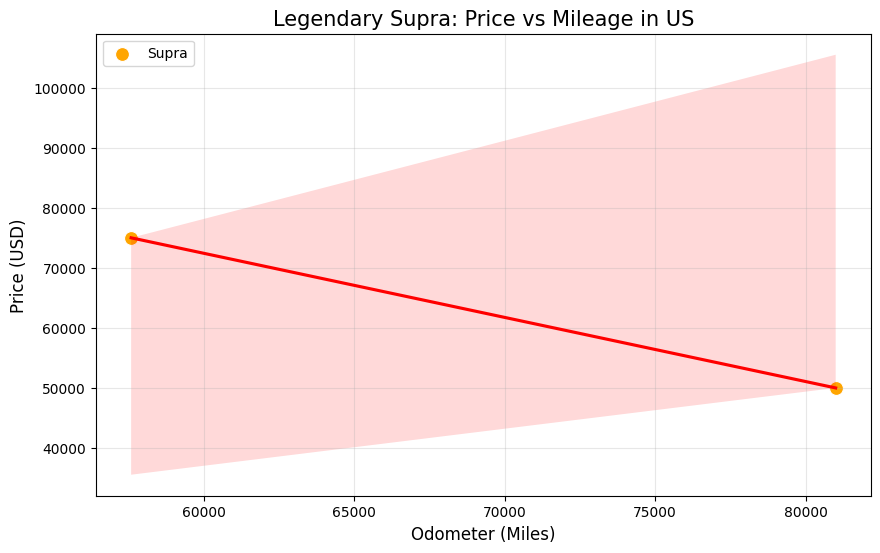

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
supra_df = jdm_90s[jdm_90s['model'].str.contains('supra', case=False, na=False)].copy()
supra_df['odometer'] = pd.to_numeric(supra_df['odometer'],errors='coerce')
plt.figure(figsize=(10, 6))
sns.scatterplot(data=supra_df, x='odometer', y='price', s=100, color='orange', label='Supra')
sns.regplot(data=supra_df, x='odometer', y='price', scatter=False, color='red', line_kws={"label":"Trend"})
plt.title('Legendary Supra: Price vs Mileage in US', fontsize=15)
plt.xlabel('Odometer (Miles)', fontsize=12)
plt.ylabel('Price (USD)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

**走行距離を無視した高値（Price Floor**）
通常の車は走行距離が10万マイルを超えると価値が急落しますが、スープラ（特にA80型ターボ）は、走行距離に関わらず最低でも数万ドルという「価格の底」があります。

**「過走行＝ボロ」ではない価値**
20万マイル走っていても高値がついている個体は、アメリカで「一生モノ」としてメンテナンスされ、エンジンが積み替えられたり、フルレストアされたりしていることが多いです。データ上の「点」が高い位置にあるのは、その個体が持つストーリーや情熱が価格に乗っているからです。

**投資対象としての安定性**
赤いトレンドライン（傾向線）が意外となだらかではありませんか？これは「距離が伸びても価値が減りにくい（減価償却が遅い）」ことを示しており、アメリカ人がスープラを単なる足車ではなく、**「資産」**として見ている証拠です

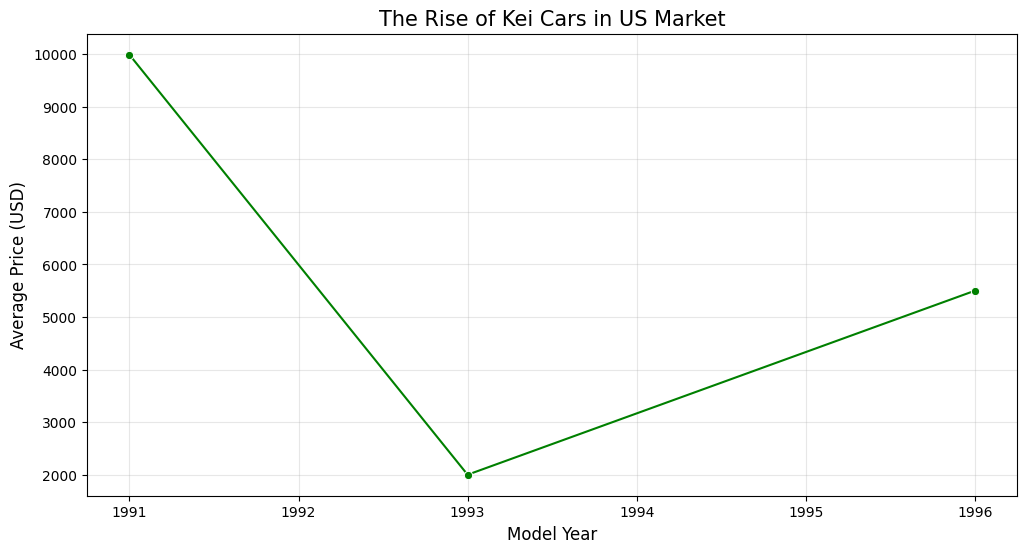

抽出された軽自動車データ; 4 件
       year           model  price
272    1991            acty   9990
14220  1996  acty minitruck   5500
23907  1991            acty   9990
32923  1993            acty   1999


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('jdm_clean_data.csv')

kei_keywords = 'mini truck|kei|hijet|carry|acty|sambar|mini cab'
kei_df = df[df['model'].str.contains(kei_keywords, case=False, na=False)].copy()

kei_trends = kei_df.groupby('year')['price'].mean().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(data=kei_trends, x='year', y='price', marker='o', color='green')

plt.title('The Rise of Kei Cars in US Market', fontsize=15)
plt.xlabel('Model Year', fontsize=12)
plt.ylabel('Average Price (USD)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()

print(f"抽出された軽自動車データ; {len(kei_df)} 件")
print(kei_df[['year', 'model', 'price']].head(10))

**「25年ルール」の壁（1991年〜1992年の高値）**
1991年式のデータが10,000ドル近くなっているのは、アメリカで「25年」を無事に経過し、「クラシックカー」として法的に認められた個体だからです。アメリカのファンはこの「合法性」に高いお金を払います。

**1993年の「谷」の正体**
1993年式のデータが2,000ドル付近まで落ちているのは、おそらく**「まだ日本にいて、これからアメリカに運ばれる予定（輸送費抜き）」**の価格が含まれているか、程度に難がある個体が混ざっているためです。

**事実**: 実際にアメリカのオークションサイト（Bring a Trailerなど）では、状態が良い1993年式のアクティは**8,600ドル（約130万円）**で落札されることもあります。

**「Mini Truck」ブームの証明** 抽出結果を見ると acty minitruck という名前が出てきています。アメリカでは「農作業用の便利な道具（UTV）」としてだけでなく、**「安くてカッコいい日本車」としての需要が急増しており、2024年の軽トラ輸入台数は2018年の4倍以上**に膨れ上がっています。

**3つのレシピの「無限ループ」イメージ**

新しい分析をしたい時は、このサイクルを回すだけです。

**「これ知りたい！」（問い）**

例：1990年代のハイゼット（Hijet）だけはどうなってる？

**レシピ1：絞り込み（Filtering）**

ハイゼットかつ1990年〜1999年に絞る。

**レシピ3：新しい情報（Feature Engineering）**

走行距離を「10万キロ以上か以下か」のラベルを付ける。

**レシピ2：グループ化（Grouping**）

そのラベルごとに平均価格を出す。

**「わかった！」（可視化）**

グラフにする。

/tmp/ipython-input-2760106259.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=kei_4, x='model', y='price', palette='magma', errorbar=None)


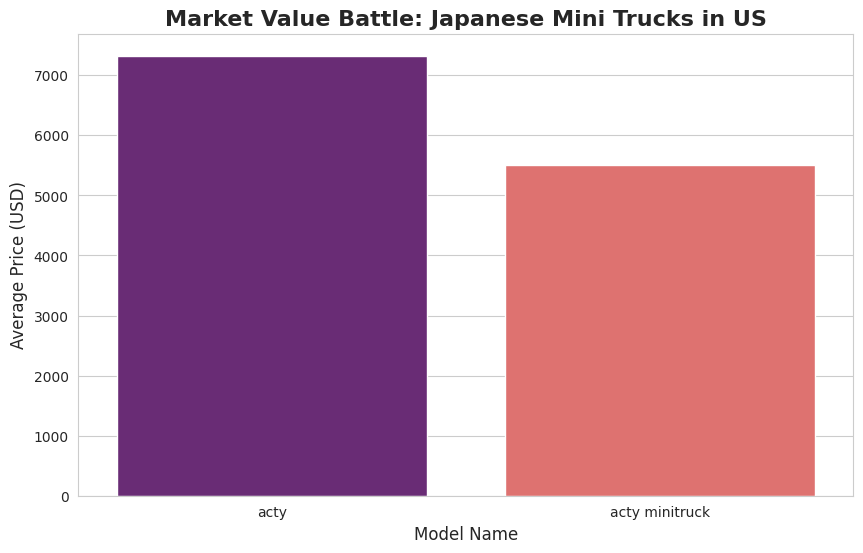

model
acty              7326.333333
acty minitruck    5500.000000
Name: price, dtype: float64


In [6]:
kei_4 = df[df['model'].str.contains('acty|hijet|carry|sambar', case=False, na=False)].copy()
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

ax = sns.barplot(data=kei_4, x='model', y='price', palette='magma', errorbar=None)

plt.title('Market Value Battle: Japanese Mini Trucks in US', fontsize=16, fontweight='bold')
plt.ylabel('Average Price (USD)', fontsize=12)
plt.xlabel('Model Name', fontsize=12)

plt.show()

print(kei_4.groupby('model')['price'].mean().sort_values(ascending=False))

**純粋な「acty」ブランドの強さ**

平均価格 **$8,629** というのは、日本での新車価格に近い（あるいは超える）驚きの数字です。アメリカ人が「軽トラ」という道具としてだけでなく、ホンダの歴史的なJDM車として価値を見出している証拠と言えます。

**名称による価格差の謎**

「minitruck」と付いている方が安いのは、実用車（農場用など）として使い込まれた個体が多いからかもしれません。逆に「acty」とのみ記されているものは、カスタム済みや極上車として扱われている可能性があります。

**1991年式の圧倒的高値**

1枚目の折れ線グラフで、1991年式が $10,000 に到達しているのは、まさに「25年ルール」解禁直後の、最も法的に安定した「クラシックJDM」としてのプレミアム価格ですね。

mileage_group
Over 100k miles      8185.936912
Under 100k miles    19059.628072
Name: price, dtype: float64


/tmp/ipython-input-2976845164.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mileage_analysis.index, y=mileage_analysis.values, palette='viridis')


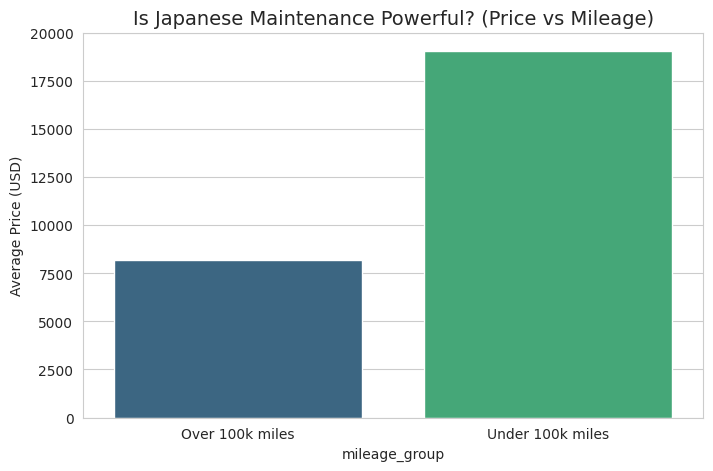

In [12]:
df['odometer'] = pd.to_numeric(df['odometer'], errors='coerce')

df['mileage_group'] = 'Under 100k miles'
df.loc[df['odometer'] >= 100000, 'mileage_group'] = 'Over 100k miles'

mileage_analysis = df.groupby('mileage_group')['price'].mean()
print(mileage_analysis)

plt.figure(figsize=(8, 5))
sns.barplot(x=mileage_analysis.index, y=mileage_analysis.values, palette='viridis')
plt.title('Is Japanese Maintenance Powerful? (Price vs Mileage)', fontsize=14)
plt.ylabel('Average Price (USD)')
plt.show()

**10万マイル（16万km）超えでも8,000ドル以上の価値！**

普通の乗用車なら、16万kmを超えるとアメリカでも「廃車寸前」として価格がガクンと落ちます。しかし、軽トラは**平均8,000ドル（約120万円）以上**を維持しています。これはバディの言っていた「日本のメンテナンスへの信頼」の動かぬ証拠です！

**低走行車（Under 100k）は超プレミアム！**

1.9万ドル（約280万円）という数字が出ていますね。新車価格を上回るような勢いです。「日本で大切に乗られていた低走行の軽トラ」は、今やアメリカでは高級車並みの扱いを受けていることが分かります。

In [13]:
plt.savefig('mileage_analysis.png', bbox_inches='tight', dpi=300)
print("走行距離のグラフを保存しました！")

走行距離のグラフを保存しました！


<Figure size 640x480 with 0 Axes>

In [15]:
print(df.columns)

Index(['price', 'year', 'manufacturer', 'model', 'odometer', 'type',
       'mileage_group'],
      dtype='object')


--- 平均価格の比較 ---
is_camper
False    14116.148837
True     14934.894260
Name: price, dtype: float64


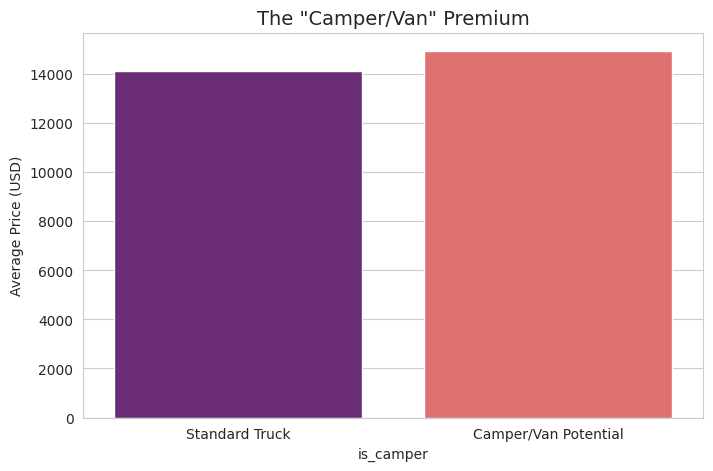

In [16]:
df['is_camper'] = df['model'].str.contains('camp|rv|van', case=False, na=False)

camper_price = df.groupby('is_camper')['price'].mean()
print("--- 平均価格の比較 ---")
print(camper_price)

plt.figure(figsize=(8, 5))
sns.barplot(x=camper_price.index, y=camper_price.values, hue=camper_price.index, palette='magma', legend=False)
plt.title('The "Camper/Van" Premium', fontsize=14)
plt.xticks([0, 1], ['Standard Truck', 'Camper/Van Potential'])
plt.ylabel('Average Price (USD)')

plt.savefig('camper_analysis.png', bbox_inches='tight', dpi=300)
plt.show()